In [1]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

In [3]:
from tensorflow.keras import models
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [4]:
df_input = pd.read_csv("CD3D_100-150℃_0.2-1.6mm_0.4-0.9V_std", usecols=[1,2,3,4,5,6])

In [5]:
df_output = pd. read_csv("CD3D_100-150℃_0.2-1.6mm_0.4-0.9V_std", usecols=[7])

In [6]:
df_input.shape

(5910000, 6)

In [7]:
df_output.shape

(5910000, 1)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(df_input, df_output, test_size=0.1, random_state=0)

In [9]:
print(x_train.shape,x_test.shape)

(5319000, 6) (591000, 6)


In [10]:
x_train

,x座標,y座標,z座標,V[V],T_cell[℃],W_ch[mm]
3442285,-0.648709,0.443142,-0.392203,-0.323148,0.290611,-0.261005
3553278,-0.398436,-0.823890,-0.134211,0.943720,0.290611,-0.261005
633342,0.627681,0.980997,-0.650196,1.577154,-1.461949,-0.261005
1505247,0.953036,1.129239,-0.285136,0.627003,-0.877763,-0.261005
865126,1.094857,0.506493,-1.424174,0.627003,-1.461949,1.345807
...,...,...,...,...,...,...
2249467,-0.427635,-1.267351,0.897760,1.260437,-0.293576,-1.064411
5157699,0.056226,-0.238204,1.671738,0.310286,1.458984,-1.064411
2215104,-0.878125,-0.063671,1.155753,0.310286,-0.293576,-1.064411
1484405,-0.223245,1.480207,0.123782,-0.323148,-0.877763,-0.261005


In [11]:
y_train

,i[A/m^2]
3442285,0.380844
3553278,-0.769117
633342,-1.208334
1505247,-0.736927
865126,-1.001348
...,...
2249467,-1.034335
5157699,0.292827
2215104,-0.285905
1484405,-0.072512


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import regularizers, initializers

model = Sequential()

weights = [com.get_weights() for com in model.layers[0:]]  #重さを抽出（※始めに回すときだけ下の行と入れ替える）



model.add(Dense(units=32, input_shape=(6,), activation='tanh'))  
model.add(Dense(units=10, activation='tanh'))  #xとyが-1～1なのでtanh
model.add(Dense(units=10, activation='tanh'))
model.add(Dense(units=1, activation='linear'))  #隠れ層3層でやってみる

model.compile(loss='mean_squared_error',    #出力は連続値なので平均二乗誤差
              optimizer='adam',             #とりあえずadamで
              metrics=['mse'],
              run_eagerly=False)   #計算時間5倍くらいかかる

In [13]:
callbacks1 = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_mse',
                            factor=0.2,
                            patience=5,
                            mode="auto",
                            min_lr=0.001)
callbacks2 = tf.keras.callbacks.EarlyStopping(monitor="val_mse",
                                              patience=20,
                                              mode="auto")
history =  model.fit(x=x_train,
                     y=y_train,
                     epochs = 20000,
                     batch_size=200,
                     validation_data=(x_test, y_test),
                     callbacks=[callbacks1,callbacks2])

Epoch 1/20000
26595/26595 [==============================] - 227s 9ms/step - loss: 0.0058 - mse: 0.0058 - val_loss: 0.0030 - val_mse: 0.0030 - lr: 0.0010
Epoch 2/20000
26595/26595 [==============================] - 233s 9ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 3.3996e-04 - val_mse: 3.3996e-04 - lr: 0.0010
Epoch 3/20000
26595/26595 [==============================] - 234s 9ms/step - loss: 2.4875e-04 - mse: 2.4875e-04 - val_loss: 2.7305e-04 - val_mse: 2.7305e-04 - lr: 0.0010
Epoch 4/20000
26595/26595 [==============================] - 232s 9ms/step - loss: 2.1291e-04 - mse: 2.1291e-04 - val_loss: 1.8093e-04 - val_mse: 1.8093e-04 - lr: 0.0010
Epoch 5/20000
26595/26595 [==============================] - 234s 9ms/step - loss: 1.9599e-04 - mse: 1.9599e-04 - val_loss: 1.6945e-04 - val_mse: 1.6945e-04 - lr: 0.0010
Epoch 6/20000
26595/26595 [==============================] - 235s 9ms/step - loss: 1.8352e-04 - mse: 1.8352e-04 - val_loss: 1.7911e-04 - val_mse: 1.7911e-04 - lr: 0.0010
Epoc

In [14]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse', 'lr'])

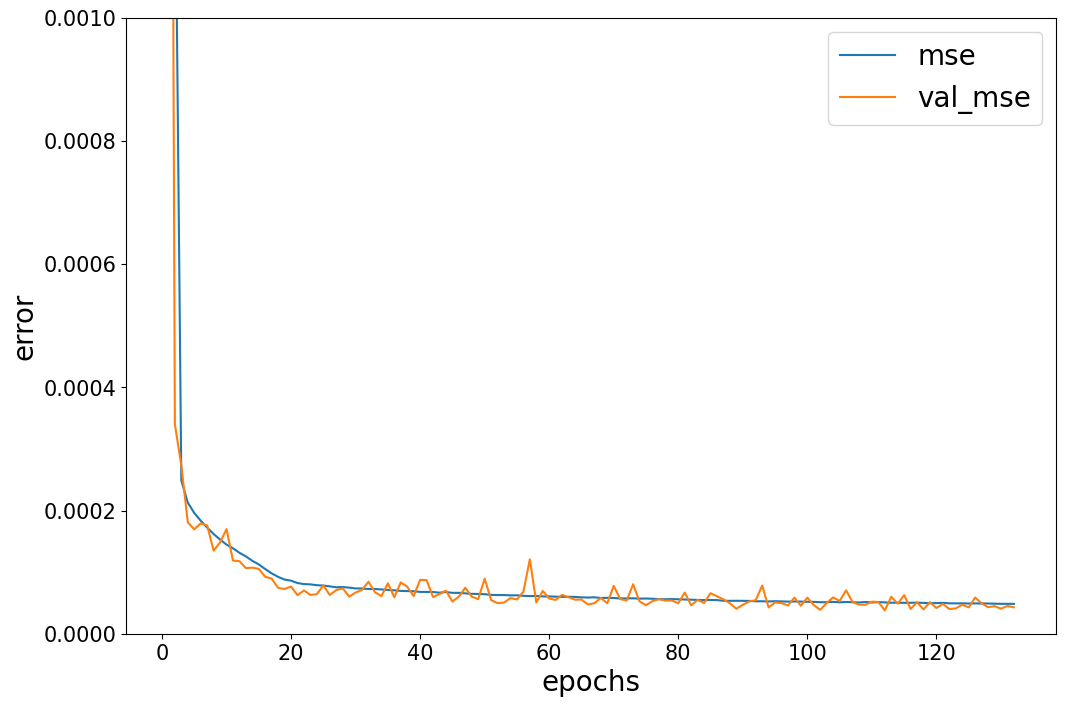

In [15]:
mse = history_dict['mse']
val_mse = history_dict['val_mse']
epochs = range(1, len(mse) + 1)

plt.rcParams["font.size"] = 15
plt.figure(figsize=(12, 8))
plt.plot(epochs, mse, label='mse')
plt.plot(epochs, val_mse, label='val_mse')
plt.xlabel("epochs",fontsize=20)
plt.ylabel("error",fontsize=20)
plt.ylim((0,0.001))
plt.legend(loc = 'best',fontsize=20)
plt.savefig('mse_transition.png')
plt.show()

In [16]:
weights = [com.get_weights() for com in model.layers[0:]] 
model.layers[0].set_weights(weights[0])
model.layers[1].set_weights(weights[1])
model.layers[2].set_weights(weights[2])

In [17]:
model.save('i_predict CD_3Ddist')

INFO:tensorflow:Assets written to: i_predict CD_3Ddist\assets
